# **CodSoft - Data Science Internship**

# **TASK 3 - SALES PREDICTION USING PYTHON**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

#### Problem Statement:
####1. Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as  advertising expenditure, target audience segmentation, and advertising platform selection.

#### 2.  Utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

#### Dataset link :- https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

### Importing the Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Understanding the dataset

In [ ]:
data = pd.read_csv('advertising.csv')

In [ ]:
data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
data.shape

(200, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Evaluating for Missing Data and handling Outliers

In [ ]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

####No, NaN or null values

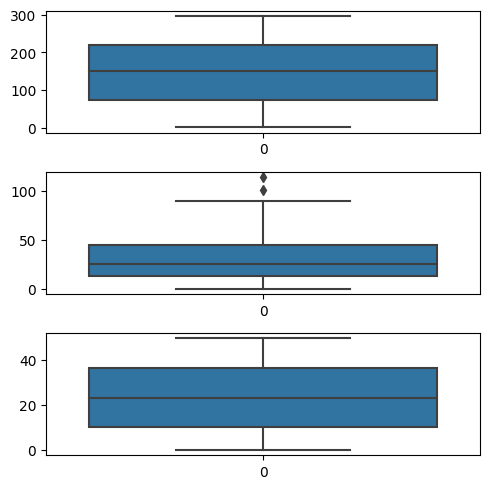

In [ ]:
fig, axs = plt.subplots(3, figsize =(5,5))
plt1=sns.boxplot(data['TV'],ax=axs[0])
plt2=sns.boxplot(data['Newspaper'],ax=axs[1])
plt3=sns.boxplot(data['Radio'],ax=axs[2])
plt.tight_layout()

#### We can see that Newspaper have some outliers.

In [ ]:
IQR = data.Newspaper.quantile(0.75)  - data.Newspaper.quantile(0.25)
min_value = data['Newspaper'].quantile(0.25) - (IQR*1.5)
max_value =data['Newspaper'].quantile(0.75) - (IQR*1.5)
print(min_value , "\n", max_value)

-35.775000000000006 
 -3.4250000000000043


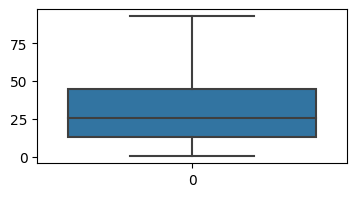

In [ ]:
data.loc[data['Newspaper']>93 , 'Newspaper'] = 93
plt.figure(figsize=(4,2))
sns.boxplot(data['Newspaper'])
plt.show()

####Now, we dont have any outliers in any columns

### Data Visualization

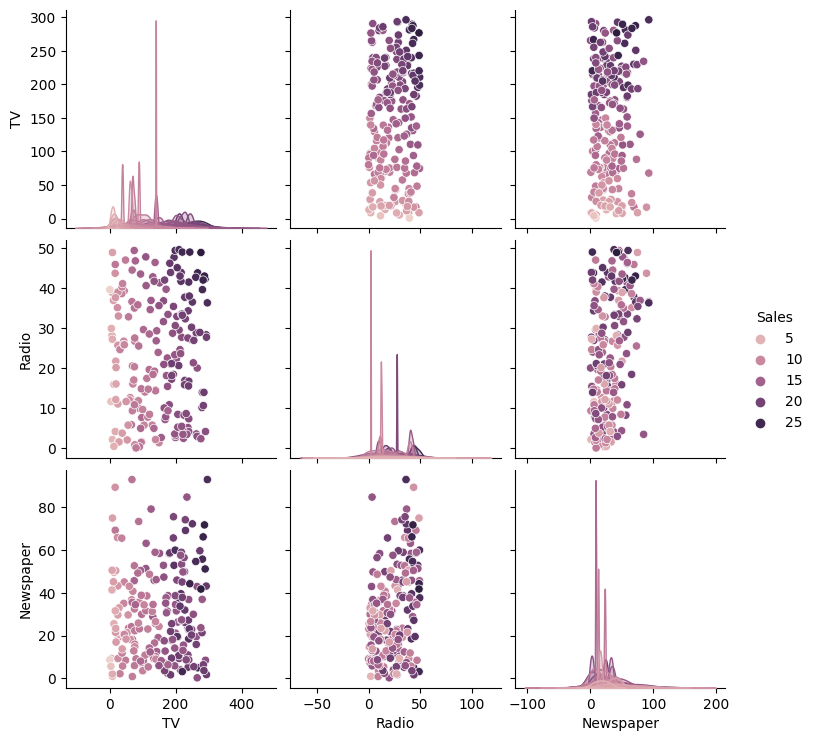

In [ ]:
sns.pairplot(data,hue="Sales")
plt.show()

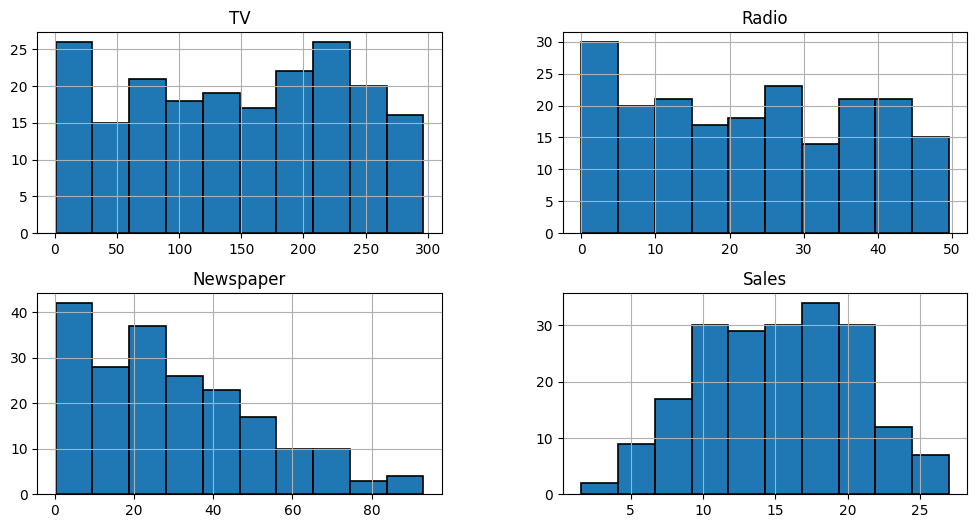

In [ ]:
data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: >

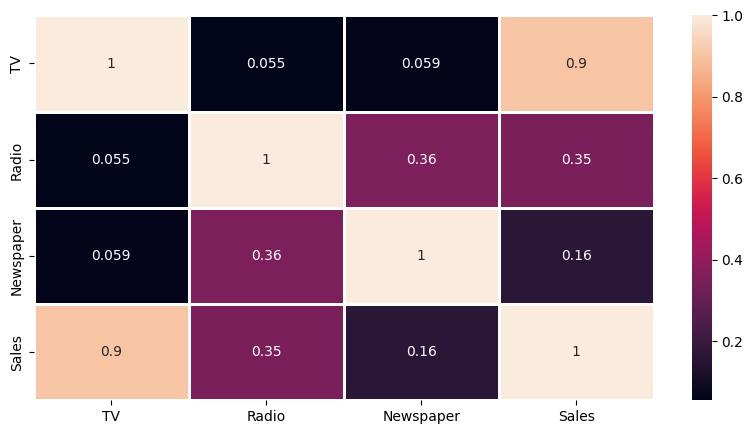

In [ ]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),linewidths=1,annot=True)

### Separating features and Spiting Data

In [ ]:
x =data[['TV','Radio','Newspaper']]
y =data[['Sales']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Linear Regression Algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
y_pred = reg.fit(x_train,y_train)
predict = reg.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.5859667227579988
R-squared: 0.8703782576148491


### Decision Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

y_pred_dt = dt.predict(x_test)
dt_reg = mean_squared_error(y_pred_dt,y_test)

print('Decision Tree Regression: ',dt_reg)

Decision Tree Regression:  1.6129999999999989


# **--------------------------------------------Thank You--------------------------------------------**